In [98]:
import os
import sys
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
path = '/content/drive/MyDrive/uber_data.csv'
data = pd.read_csv(path)
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,6.20,-73.788773,40.647758,1,N,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,0.70,-73.958221,40.764641,1,N,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,7.18,-73.985779,40.741192,1,N,-73.946350,40.797878,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00


In [101]:
print(data.shape)
print(data.info())
print(data.describe())

(100000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                1

In [102]:
print(data.isnull().sum())
data.dropna(inplace = True)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [103]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [104]:
data.drop_duplicates(inplace = True)
data.reset_index()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2016-03-01 06:17:10,2016-03-01 06:22:15,1,0.50,-73.990898,40.750519,1,N,-73.998245,40.750462,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,99996,1,2016-03-01 06:17:10,2016-03-01 06:32:41,1,3.40,-74.014488,40.718296,1,N,-73.982361,40.752529,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,99997,1,2016-03-01 06:17:10,2016-03-01 06:37:23,1,9.70,-73.963379,40.774097,1,N,-73.865028,40.770512,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,99998,2,2016-03-01 06:17:10,2016-03-01 06:22:09,1,0.92,-73.984901,40.763111,1,N,-73.970695,40.759148,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [105]:
columns = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','tip_amount','tolls_amount','improvement_surcharge','total_amount','VendorID','passenger_count','store_and_fwd_flag','payment_type','extra','mta_tax']
data = data.drop(columns = columns)

In [106]:
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
data['pickup_day'] = data['tpep_pickup_datetime'].dt.day
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek

data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month
data['dropoff_day'] = data['tpep_dropoff_datetime'].dt.day
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour
data['dropoff_day_of_week'] = data['tpep_dropoff_datetime'].dt.dayofweek

data = data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_distance        100000 non-null  float64
 1   RatecodeID           100000 non-null  int64  
 2   fare_amount          100000 non-null  float64
 3   pickup_month         100000 non-null  int64  
 4   pickup_day           100000 non-null  int64  
 5   pickup_hour          100000 non-null  int64  
 6   pickup_day_of_week   100000 non-null  int64  
 7   dropoff_month        100000 non-null  int64  
 8   dropoff_day          100000 non-null  int64  
 9   dropoff_hour         100000 non-null  int64  
 10  dropoff_day_of_week  100000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 9.2 MB


In [108]:
import sklearn
from sklearn.model_selection import train_test_split

features = data.drop('fare_amount', axis=1)
target = data['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [109]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
predictions = model.predict(X_test)

In [111]:
from sklearn.metrics import mean_absolute_error

lr_mae_outliers = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {lr_mae_outliers}')

Mean Absolute Error: 2.0265181233653675


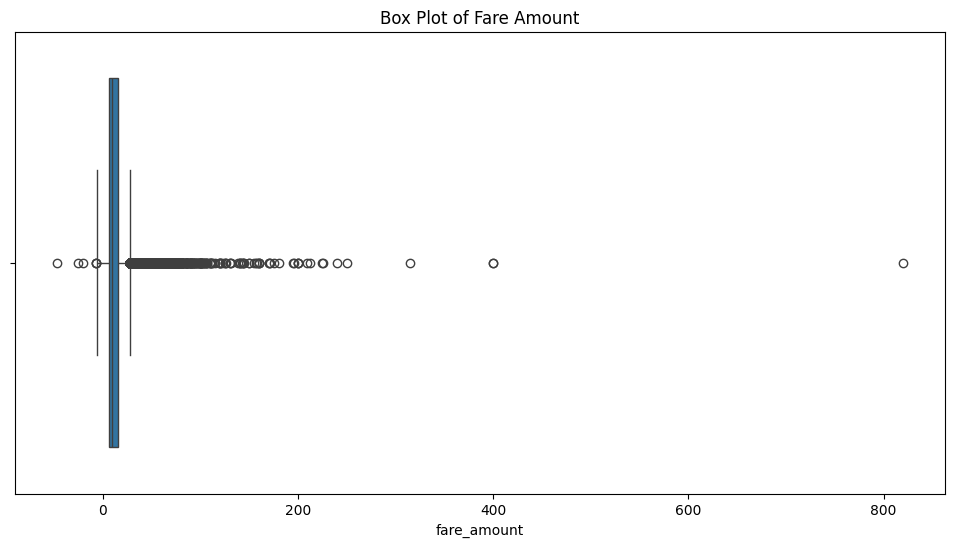

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.show()

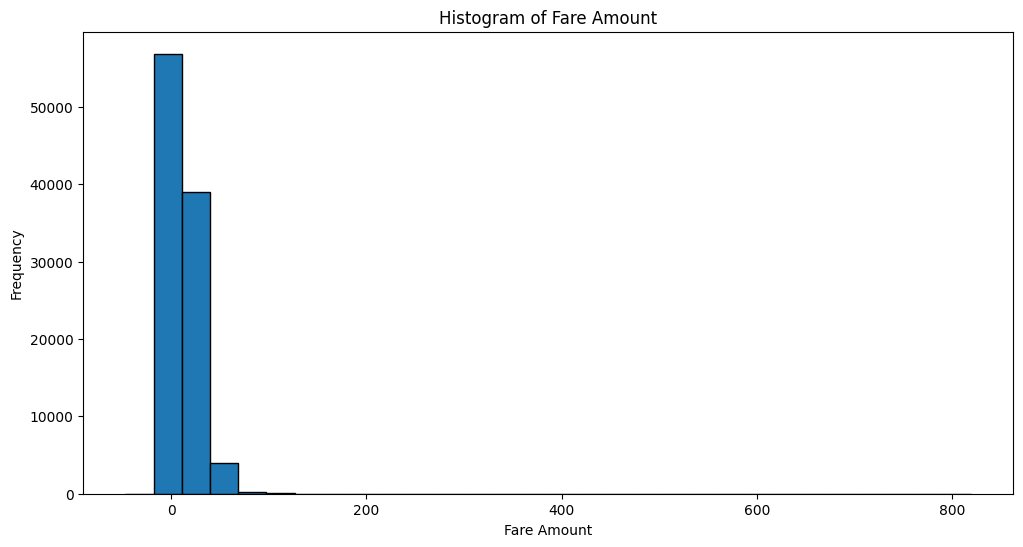

In [113]:
plt.figure(figsize=(12, 6))
plt.hist(data['fare_amount'], bins=30, edgecolor='black')
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

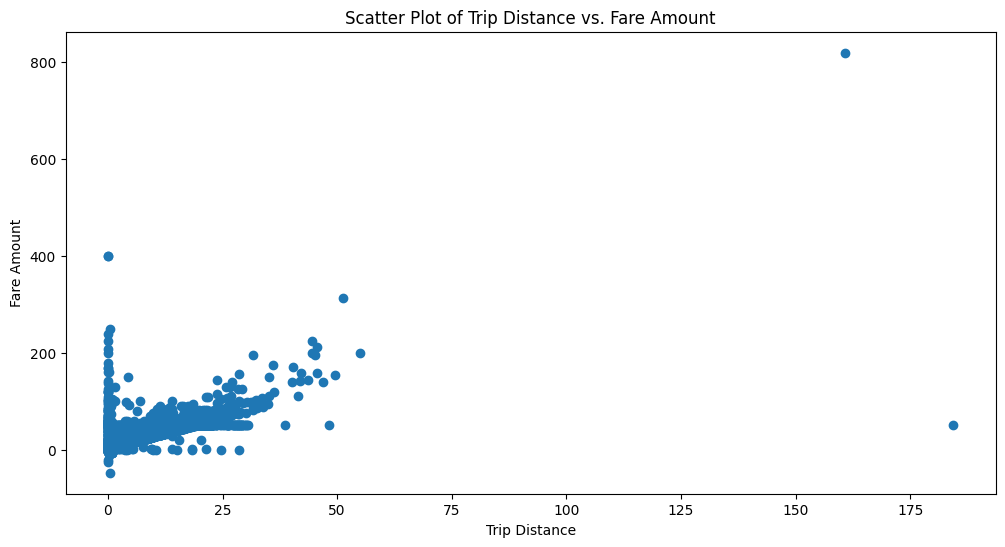

In [114]:
plt.figure(figsize=(12, 6))
plt.scatter(data['trip_distance'], data['fare_amount'])
plt.title('Scatter Plot of Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

In [115]:
import scipy
from scipy.stats import zscore

z_scores = zscore(data['fare_amount'])

In [116]:
z_scores

0       -0.363921
1       -0.192769
2        3.529788
3        1.561539
4        7.252345
           ...   
99995   -0.706225
99996    0.063959
99997    1.347599
99998   -0.663437
99999   -0.620649
Name: fare_amount, Length: 100000, dtype: float64

In [117]:
average_z_score = z_scores.mean()
print(average_z_score)

-1.261923898709938e-16


In [118]:
threshold = 2
outliers = (abs(z_scores) > threshold)

In [119]:
data_no_outliers = data[~outliers]

In [120]:
features_no_outliers = data_no_outliers.drop('fare_amount', axis=1)
target_no_outliers = data_no_outliers['fare_amount']

In [121]:
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(features_no_outliers, target_no_outliers, test_size=0.2, random_state=42)

In [122]:
model = LinearRegression()
model.fit(X_train_no_outliers, y_train_no_outliers)

LinearRegression()

In [123]:
predictions = model.predict(X_test_no_outliers)

In [124]:
lr_mae_no_outliers = mean_absolute_error(y_test_no_outliers, predictions)
print(f'Mean Absolute Error: {lr_mae_no_outliers}')

Mean Absolute Error: 1.5215281599311803


In [125]:
from sklearn.ensemble import RandomForestRegressor

rf_model_with_outliers = RandomForestRegressor(random_state=42)
rf_model_with_outliers.fit(X_train, y_train)
predictions_with_outliers_rf = rf_model_with_outliers.predict(X_test)
mae_with_outliers_rf = mean_absolute_error(y_test, predictions_with_outliers_rf)
print(f'MAE with Random Forest (With Outliers): {mae_with_outliers_rf}')

rf_model_no_outliers = RandomForestRegressor(random_state=42)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
predictions_no_outliers_rf = rf_model_no_outliers.predict(X_test_no_outliers)
mae_no_outliers_rf = mean_absolute_error(y_test_no_outliers, predictions_no_outliers_rf)
print(f'MAE with Random Forest (Without Outliers): {mae_no_outliers_rf}')

MAE with Random Forest (With Outliers): 1.5125676053818067
MAE with Random Forest (Without Outliers): 1.3878092522111332


In [126]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model_with_outliers = GradientBoostingRegressor(random_state=42)
gb_model_with_outliers.fit(X_train, y_train)
predictions_with_outliers_gb = gb_model_with_outliers.predict(X_test)
mae_with_outliers_gb = mean_absolute_error(y_test, predictions_with_outliers_gb)
print(f'MAE with Gradient Boosting (With Outliers): {mae_with_outliers_gb}')

gb_model_no_outliers = GradientBoostingRegressor(random_state=42)
gb_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
predictions_no_outliers_gb = gb_model_no_outliers.predict(X_test_no_outliers)
mae_no_outliers_gb = mean_absolute_error(y_test_no_outliers, predictions_no_outliers_gb)
print(f'MAE with Gradient Boosting (Without Outliers): {mae_no_outliers_gb}')

MAE with Gradient Boosting (With Outliers): 1.4489405679339225
MAE with Gradient Boosting (Without Outliers): 1.3030740003675663


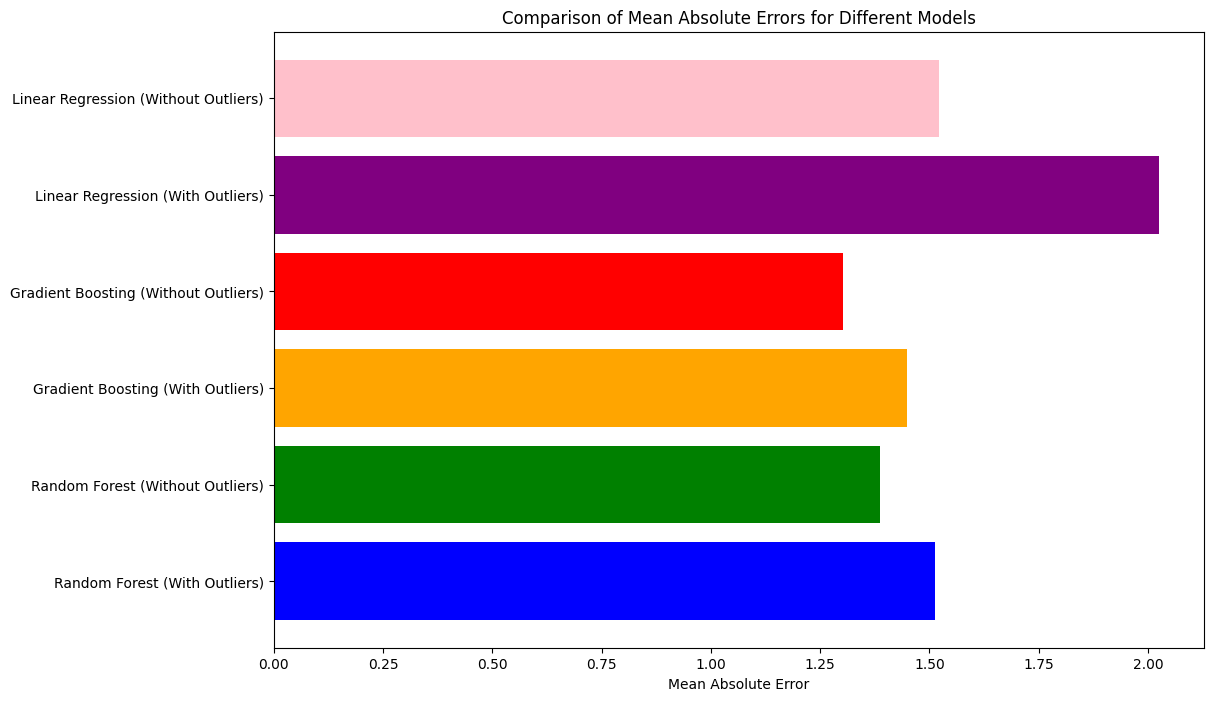

In [127]:
mae_values = [mae_with_outliers_rf, mae_no_outliers_rf, mae_with_outliers_gb, mae_no_outliers_gb, lr_mae_outliers, lr_mae_no_outliers]
models = ['Random Forest (With Outliers)', 'Random Forest (Without Outliers)', 'Gradient Boosting (With Outliers)', 'Gradient Boosting (Without Outliers)', 'Linear Regression (With Outliers)', 'Linear Regression (Without Outliers)']

plt.figure(figsize=(12, 8))
plt.barh(models, mae_values, color=['blue', 'green', 'orange', 'red', 'purple', 'pink'])
plt.xlabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Errors for Different Models')
plt.show()